# Knowledge Engineering

Knowledge Engineering è il processo di comprendere come rappresentare proposizioni e logica in IA.

## Come applicare le conoscenze

Tutte le soluzioni useranno funzioni appartenenti al file [logic.py](logic.py)

Affrontiamo la questione valutando il gioco Clue (Cluedo in italiano)

Nel gioco, è stato commesso un omicidio da una *persona*, usando un'*arma*, in un certo *luogo*. Persone, armi e luoghi sono rappresentati da carte. Ogni carta di ogni categoria è estratta a caso e posta in una busta, ed è compito dei partecipanti scoprire chi è stato.

Ciò avviene scoprendo carte e deducendo da esse indizi riguardo ciò che potrebbe esserci nella busta. Useremo l'algoritmo Model Checking prima di scoprire il mistero. Nel nostro modello, marchieremo come `True` gli oggetti che sappiamo essere legati all'omicidio, altrimenti come `False`

### Esempio 1: Clue

Abbiamo tre persone, tre armi e tre luoghi. La tabella è riassuntiva, non indica connessioni.

| Persone | Armi | Luoghi |
| --- | --- | --- |
| Mustard | knife | ballroom |
| Plum | revolver | kitchen |
| Scarlet | wrench | library |

Iniziamo creando la nostra Knowledge Base aggiungendo le regole del gioco:
- Sappiamo per certo che una persona è l'assassino
- Una sola arma è stata usata
- L'omicidio è avvenuto in un solo luogo

Questo può essere rappresentato in Propositional Logic nel seguente modo:

Colpevole: (Mustard ∨ Plum ∨ Scarlet)

Arma: (knife ∨ revolver ∨ wrench)

Luogo: (ballroom ∨ kitchen ∨ library)

Il gioco inizia con ogni giocatore che vede una persona, un'arma e un luogo, quindi sapendo che non sono legati all'omicidio. I giocatori non condividono le informazioni che hanno visto nelle carte.

Supponiamo che peschiamo `Mustard`, `kitchen` e `revolver`. Sappiamo ora che queste carte non sono legate all'omicidio e possiamo aggiungere alla nostra KB:

¬(Mustard)

¬(kitchen)

¬(revolver)

In altre situazioni del gioco, qualcuno potrebbe tirare a indovinare una combinazione di persona/arma/luogo. Supponiamo che tiriamo a indovinare: `Scarlet` ha usato una `wrench` per commettere il crimine nella `library`. Se sbagliamo, allora possiamo dedurre le seguenti informazioni e aggiungerle alla KB:

(¬Scarlet ∨ ¬library ∨ ¬wrench)

Ora supponiamo che qualcuno ci mostri la carta `Plum`. Possiamo aggiungere alla KB anche:

¬(Plum)

A questo punto, possiamo concludere che l'assassino è `Scarlet`, dal momento che deve essere uno tra `Mustard`, `Plum` e `Scarlet`, e abbiamo le prove che i primi due non lo sono.

Aggiungendo un solo pezzo di conoscenza, ad esempio che l'omicidio non è avvenuto nella `ballroom`, possiamo avere ancora più informazioni. Innanzitutto aggiorniamo la KB:

¬(ballroom)

E ora, usando i dati a nostra disposizione, possiamo dedurre che `Scarlet` ha effettuato l'omicidio con un `knife` nella `library`.

Possiamo dedurre che è la `library` perché deve essere `ballroom`, `kitchen` o `library`, e abbiamo provato che i primi due non sono i luoghi dell'omicidio.

Poi l'affermazione casuale `Scarlet`,`library`, `wrench` era falsa, quindi almeno uno degli elementi dell'affermazione è falso.

Visto che sappiamo che `Scarlet` e `library` sono veri, sappiamo che la parte falsa è `wrench`.

Visto che una delle tre armi è vera, e non è `wrench` o `revolver`, allora è sicuramente `knife`

#### Esempio in codice

Il codice sottostante è un esempio di come aggiungere tutte le informazioni dedotte sopra a una KB in python.

Per una soluzione, guardare il file [clue.py](clue.py)

In [ ]:
# ruff: noqa: F403, F405
# type: ignore

from logic import *

# Add the clues to the KB
knowledge = And(

    # Start with the game conditions: one item in each of the three categories has to be true.
    Or(mustard, plum, scarlet),
    Or(ballroom, kitchen, library),
    Or(knife, revolver, wrench),

    # Add the information from the three initial cards we saw
    Not(mustard),
    Not(kitchen),
    Not(revolver),

    # Add the guess someone made that it is Scarlet, who used a wrench in the library
    Or(Not(scarlet), Not(library), Not(wrench)),

    # Add the cards that we were exposed to
    Not(plum),
    Not(ballroom)
)

### Esempio 2: un altro puzzle logico

Basato su Harry Potter. Soluzione in [puzzle.py](puzzle.py)

Consideriamo le seguenti affermazioni:

- Gilderoy, Minerva, Pomona e Horace appartengono, ognuno, a una delle seguenti case: Gryffindor, Hufflepuff, Ravenclaw, e Slytherin
- C'è esattamente una persona in ogni casa
- Gilderoy appartiene a Gryffindor o Ravenclaw
- Pomona non appertiene a Slytherin
- Minerva appartiene a Gryffindor

#### Simboli Propositivi

Abbiamo bisogno di introdurre un simbolo relativo all'appartenenza di ogni singola persona a ogni singola casa:

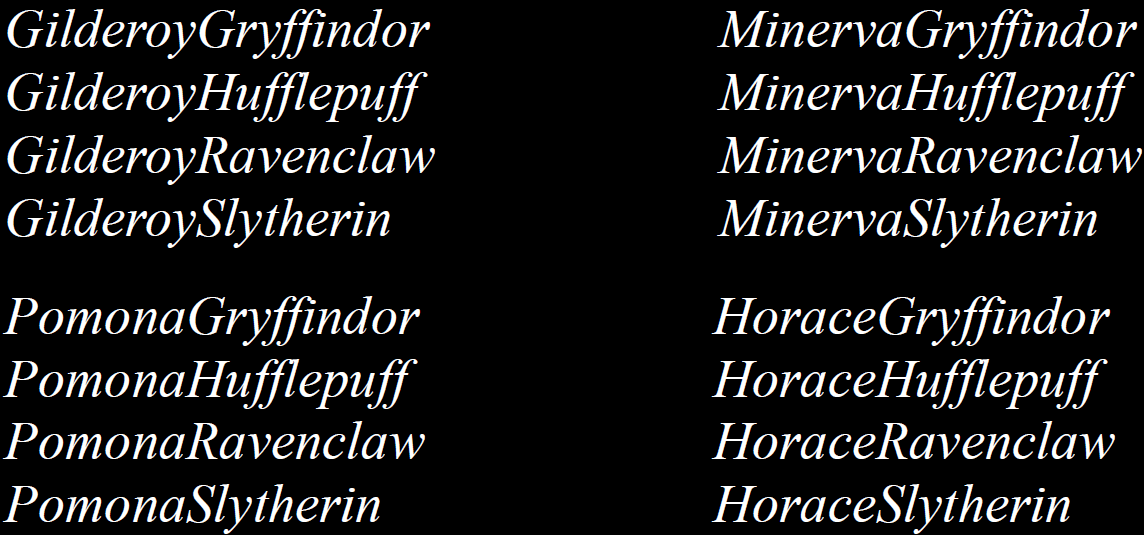

#### Conoscenze

Sappiamo innanzitutto che se una persona è in una casa, non è nelle altre.
- (MinervaGryffindor → ¬MinervaHufflepuff)

Sappiamo, poi, che se una persona è in una casa, le altre non lo sono.
- (MinervaGryffindor → ¬GilderoyGryffindor)

Poi, dalle conoscenze specifiche dateci:
- (GilderoyGryffindor ∨ GilderoyRavenclaw)

Da qui, possiamo rintracciare la soluzione al puzzle senza problemi.

### Esempio 3: Esempio 2 solo con le prime due affermazioni

Consideriamo le seguenti affermazioni:

- Gilderoy, Minerva, Pomona e Horace appartengono, ognuno, a una delle seguenti case: Gryffindor, Hufflepuff, Ravenclaw, e Slytherin
- C'è esattamente una persona in ogni casa

Rappresentare le condizioni del puzzle precedente, senza vincoli, in Propositional Logic è abbastanza faticoso:
- Innanzitutto, ognuno dei possibili assegnamenti deve essere di per sé una proposizione: MinervaGryffindor, MinervaHufflepuff, MinervaRavenclaw, MinervaSlytherin, PomonaGryffindor…
- Poi, per rappresentare che ogni persona appartiene a una casa, è richiesto un Or statement con tutte le possibili assegnazioni per persona: (MinervaGryffindor ∨ MinervaHufflepuff ∨ MinervaRavenclaw ∨ MinervaSlytherin), ripeti per tutti.

Poi, per indicare che se una persona è assegnata a una casa non è assegnata alle altre, scriveremo:
- (MinervaGryffindor → ¬MinervaHufflepuff) ∧ (MinervaGryffindor → ¬MinervaRavenclaw) ∧ (MinervaGryffindor → ¬MinervaSlytherin) ∧ (MinervaHufflepuff → ¬MinervaGryffindor)…

E così via per tutte le case e le persone.

Una soluzione a quest'inefficienza sarà vista nella sezione sulla First Order Logic.

### Esempio 4: Mastermind

Giochiamo a una versione semplificata di Mastermind. Soluzione in [mastermind.py](mastermind.py)

1. Ci sono solo 4 colori: Rosso, Blu, Verde e Giallo
2. Giocatore 1 ordina i colori in un certo modo, ma non sappiamo quale
3. Giocatore 2 deve indovinare l'ordine
4. Ogni turno, Giocatore 2 fa una supposizione e Giocatore 1 restituisce un numero, che indica quanti colori nella posizione giusta sono stati indicati.

Presumiamo che Giocatore 1 abbia fatto la sua ascelta. Io, Giocatore 2, suggerirò innanzitutto questa combinazione:

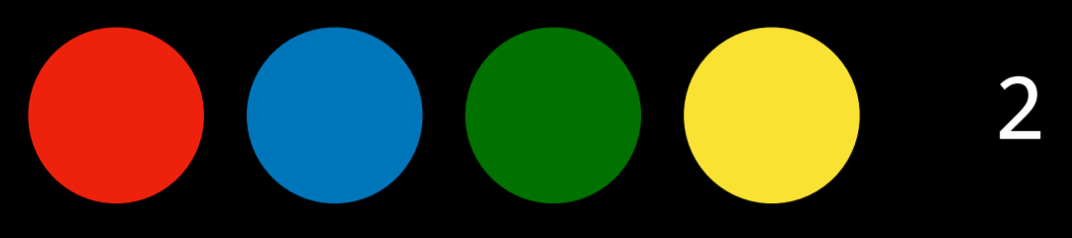

Giocatore 1 risponderà "Due", quindi sappiamo che due dei colori sono nella posizione corretta e gli altri due in quella sbagliata. Basandomi su quest'informazione, scambio la posizione di due colori, tenendo in mente la mia prima risposta:

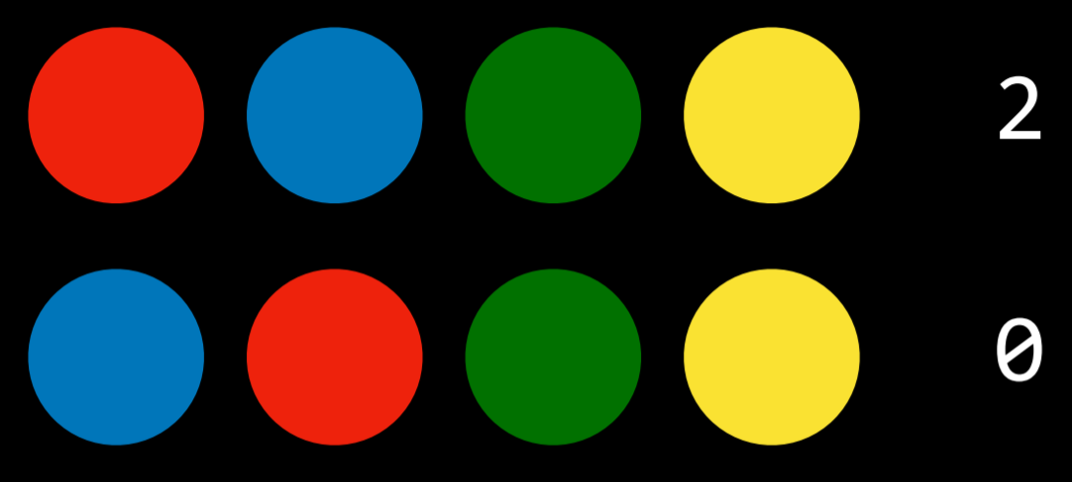

Ora Giocatore 1 risponde "Zero", quindi so che i colori scambiati erano quelli inizialmente giusti. I colori da scambiare sono quelli che ho ignorato. Li scambio:

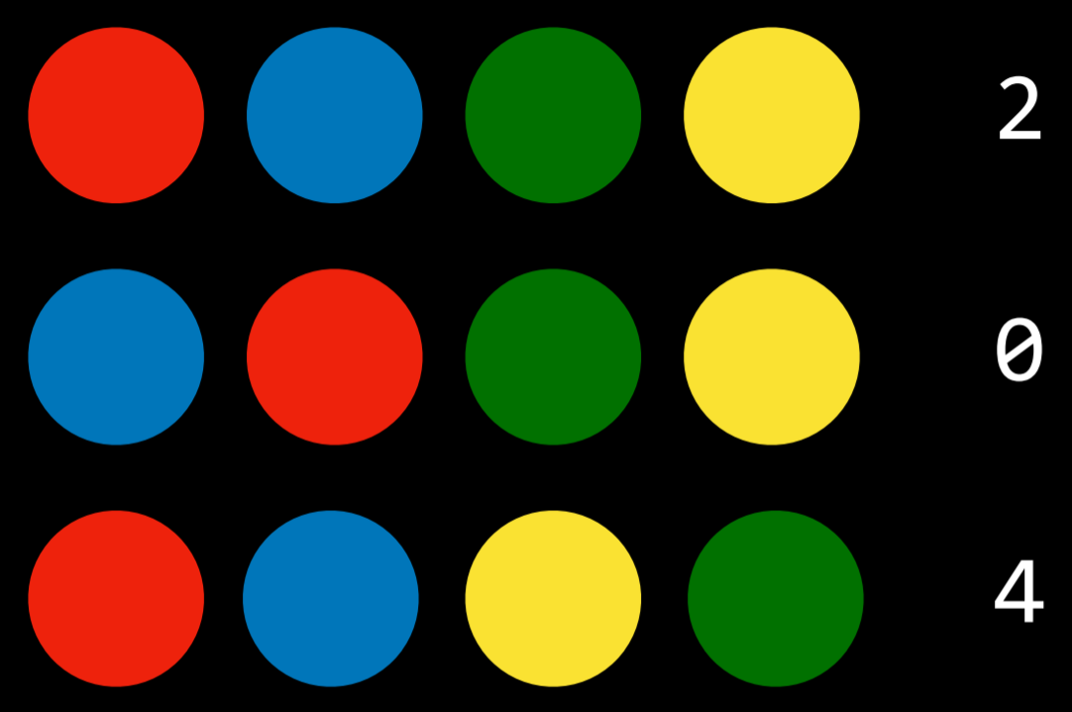

Giocatore 1 dice "Quattro", il gioco termina.


#### Conclusioni

Rappresentare questa logica propositiva richiederebbe avere $n^{2}$ proposizioni atomiche, dove $n$ è il numero di colori.

Quindi, nel caso di 4 colori, avremmo rosso1, rosso2, rosso3, blu1, ... che rappresentano colore e posizione.

Il prossimo passo sarebbe rappresentare le regole del gioco in logica propositiva, cioè c'è un solo colore per ogni posizione e nessun colore si ripete, e aggiungerle alla KB

Il passo finale sarebbe aggiungere tutti gli indizi che abbiamo alla KB. Nel nostro caso aggiungeremmo:
1. Nella prima risposta, due posizioni erano sbagliate e due giuste
2. Nella seconda risposta, nessuna posizione era giusta

Con questa conoscenza, un algoritmo di Model Checking può darci la soluzione al puzzle, ma l'efficienza dell'algoritmo inizia a diminuire all'aumentare della quantità di conoscenza, visto che deve controllare ogni singolo modello prima di poter rispondere. Per ovviare, usiamo le **Inference Rules**

## Inference Rules

Regole che possono essere applicate per prendere conoscenza pre-esistente e tradurla in nuova conoscenza.

Le rappresento con una riga orizzontale, piazzo al di sopra la conoscenza che ho già e, sotto, la conclusione generata a partire dalle premesse.

Le regole che vedremo sono:
- Modus Ponens
- And Elimination
- Double Negation Elimination
- Implication Elimination
- Biconditional Elimination
- Regola di DeMorgan
- Proprietà Distributiva

### Modus Ponens

Se sappiamo che un'implicazione e il suo antecedente sono veri, allora anche il conseguente è vero.

Quindi, se $α$ implica $β$, e $α$ è vera, allora $β$ è vera.

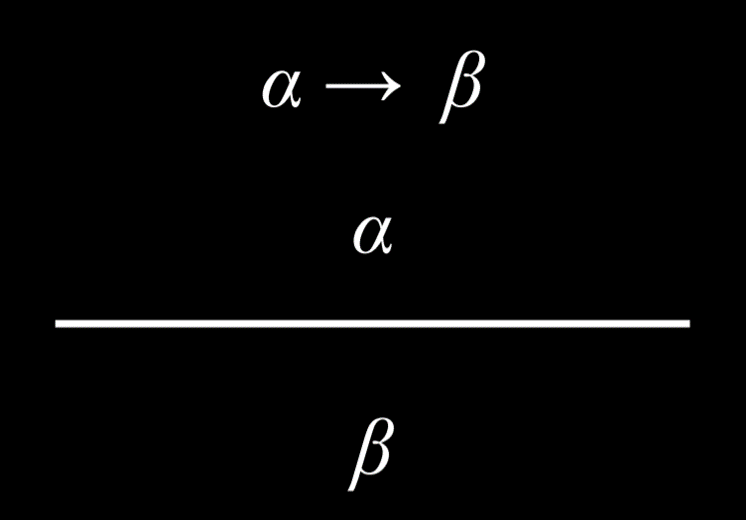

#### Esempio

Le nostre premesse sono costituite da:
- Se sta piovendo, allora Harry è dentro casa
- Sta piovendo

Basandoci sulle premesse, una persona normale concluderebbe che:
- Harry è dentro casa

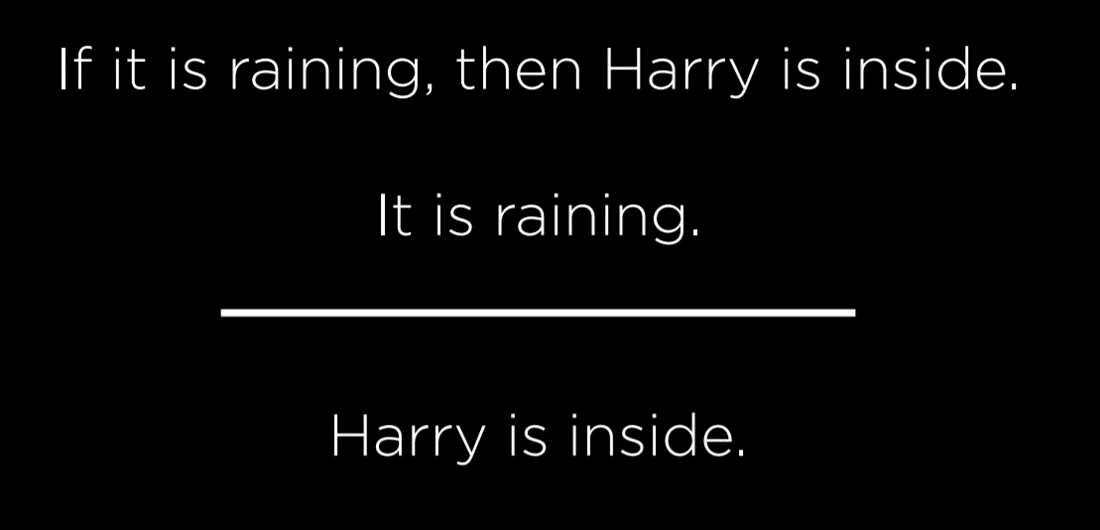

### And Elimination

Se una proposizione And è vera, allora ogni singola proposizione atomica al suo interno è vera.

Quindi, se $α∧β$, allora $α$ è vera. Ciò vale anche per $β$

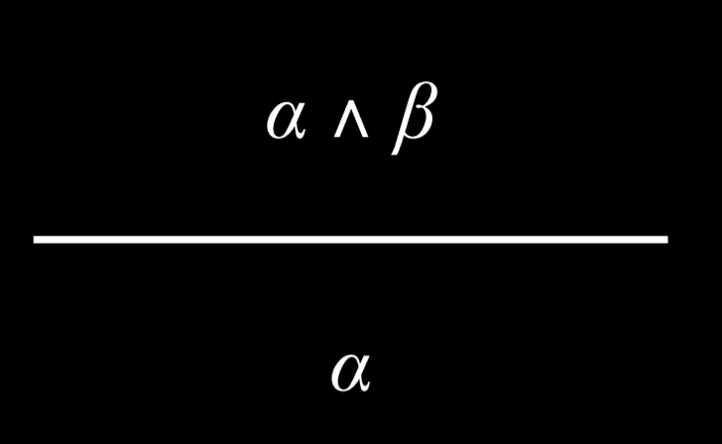

#### Esempio:

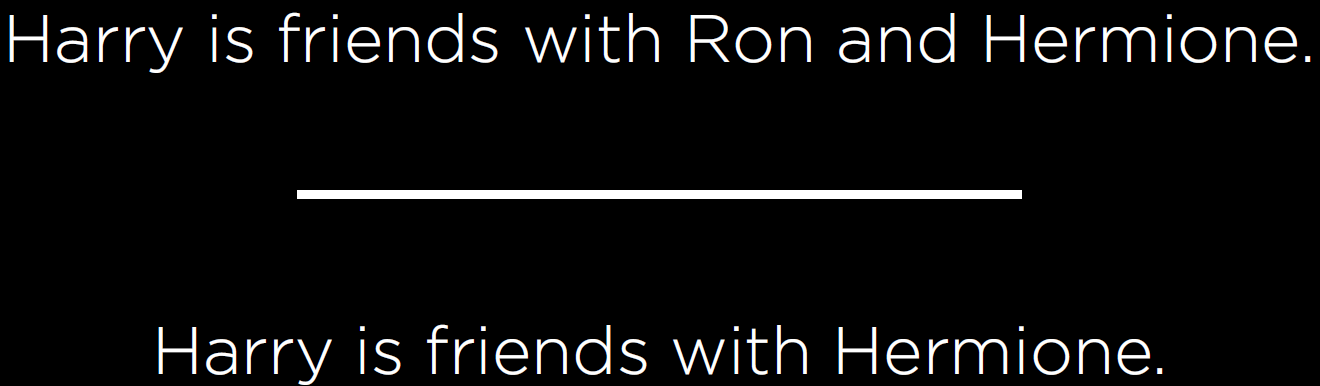

### Double Negation Elimination

Una proposizione negata due volte è vera.

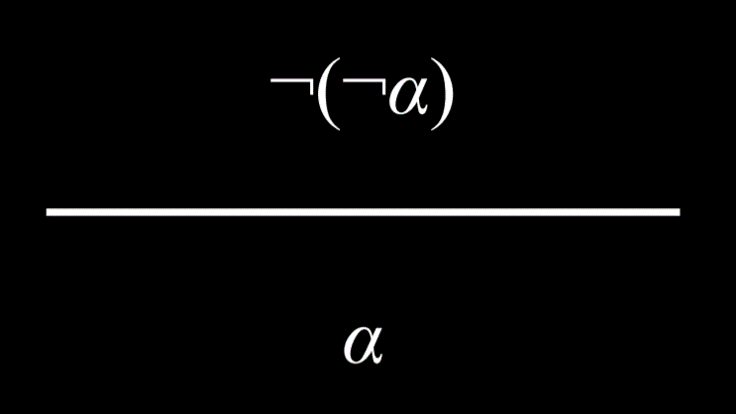

#### Esempio

Considerata la proposizione: "Non è vero che Harry non ha passato l'esame", possiamo valutarla nel modo seguente:

- "Non è vero che (Harry non ha passato l'esame)"
oppure
- "¬(Harry non ha passato l'esame)"
e, finalmente
- "¬(¬(Harry ha passato l'esame))"

Le due negazioni si cancellano, marcando la proposizione "Harry ha passato l'esame" come vera.

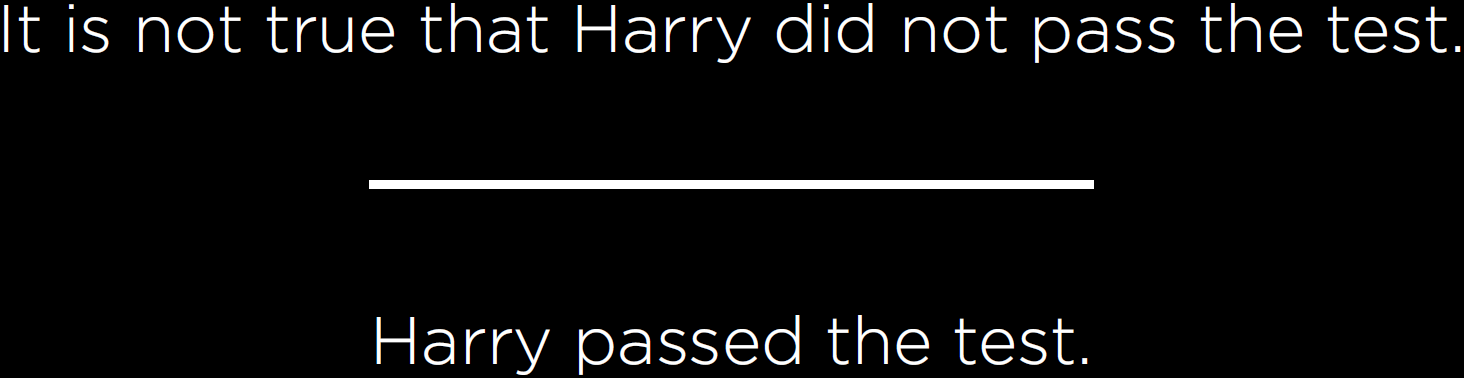

### Implication Elimination

Un'Implication Elimination è equivalente a una relazione Or tra l'*antecedente negato* e il *conseguente*

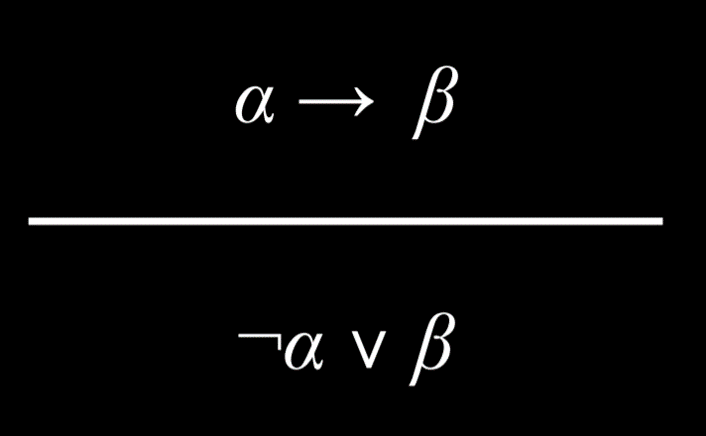

#### Esempio

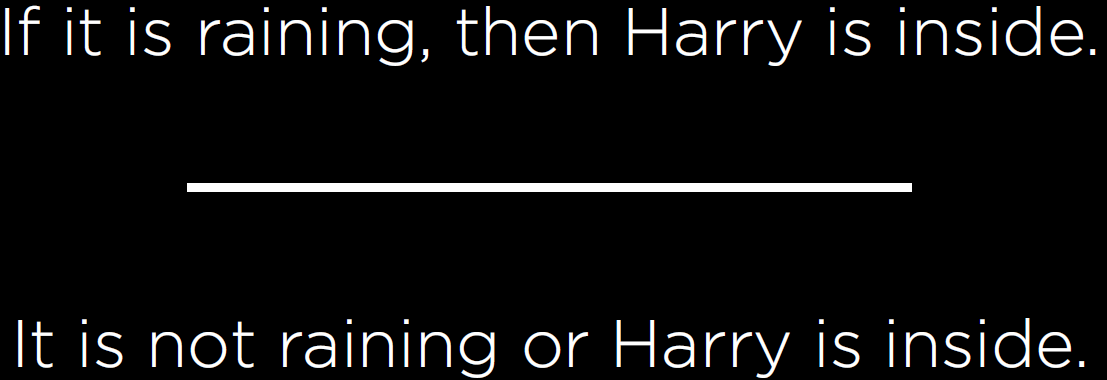

Questa regola può essere un po' confusionale. Per completezza, valutiamo la seguente tabella di verità:

| Simbolo | Valore |
| --- | --- |
| P | False |
| Q | False |
|P → Q | True |
| ¬P ∨ Q | True |
| --- | --- |
| P | False |
| Q | True |
|P → Q | True |
| ¬P ∨ Q | True |
| --- | --- |
| P | True |
| Q | False |
|P → Q | False |
| ¬P ∨ Q | False |
| --- | --- |
| P | True |
| Q | True |
|P → Q | True |
| ¬P ∨ Q | True |

Dal momento che $P → Q$ e $¬P ∨ Q$ hanno la stessa assegnazione di verità, sappiamo che sono logicamente equivalenti.

Un'altra scuola di pensiero è che un'implicazione è vera se una di due possibili condizioni è soddisfatta:
1. Se l'antecedente è falso, l'implicazione è trivialmente vera
  - Questo è rappresentato dall'antecedente negato (¬P) in $¬P ∨ Q$, quindi la proposizione è sempre vera se P è falso
2. L'implicazione è vera quando l'antecedente è vero solo quando il conseguente è a sua volta vero
  - Cioè, se P e Q sono entrambi veri, allora $¬P ∨ Q$ è vero. Tuttavia, se P è vero e Q è falso, allora $¬P ∨ Q$ è falso

### Biconditional Elimination

Una proposizione coimplicita è equivalente a un'implicazione e il suo inverso, legati da un And

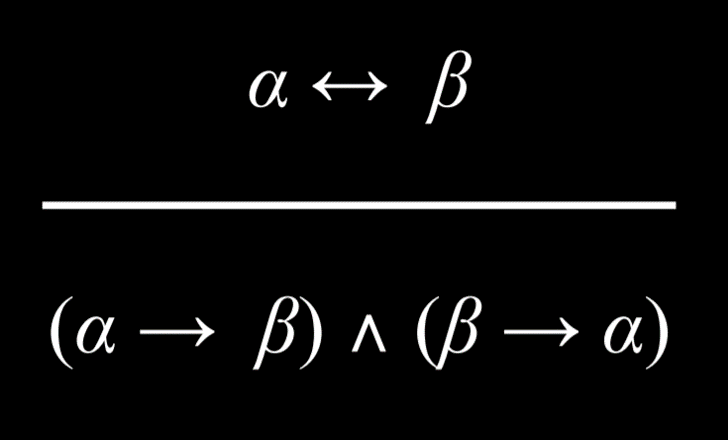

#### Esempio

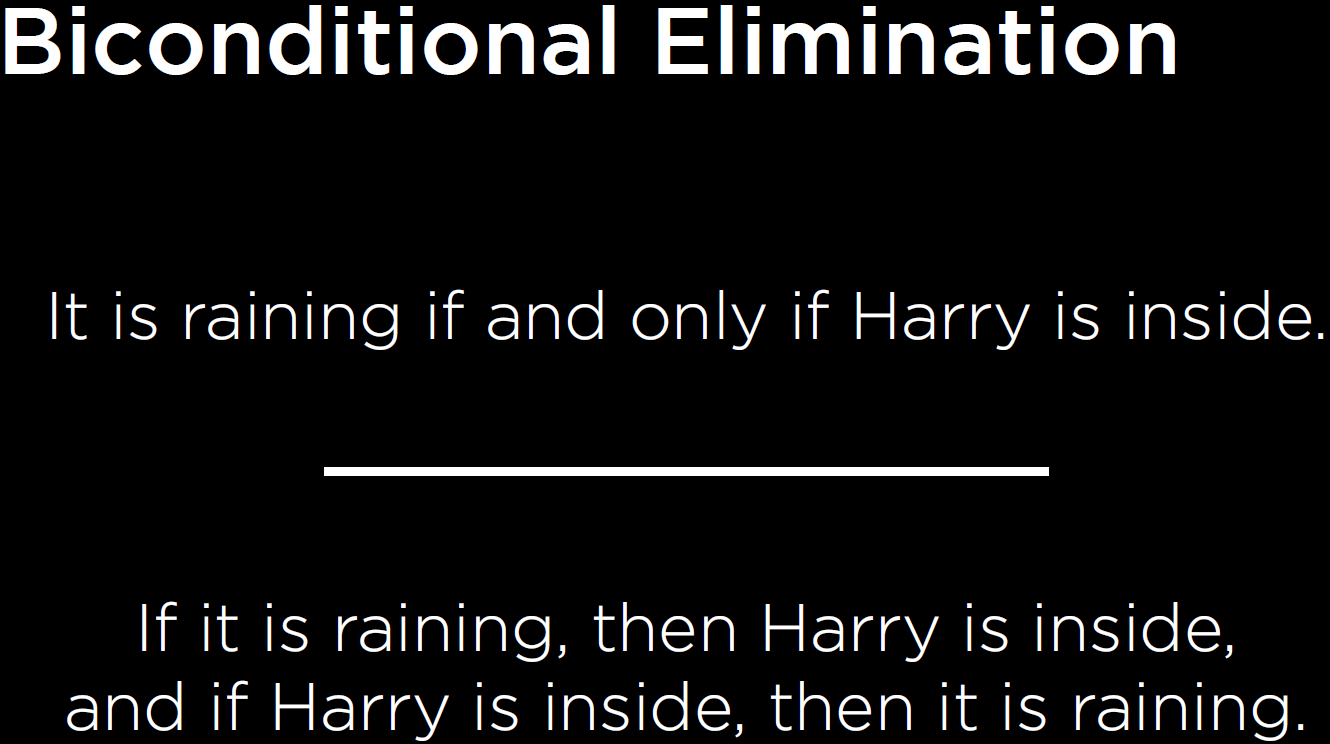

### DeMorgan's Law (Legge di DeMorgan)

Si può trasformare un connettore And in un Or.

Affinché la proposizione con And sia vera, almeno una delle due proposizioni nell'Or deve essere vera.

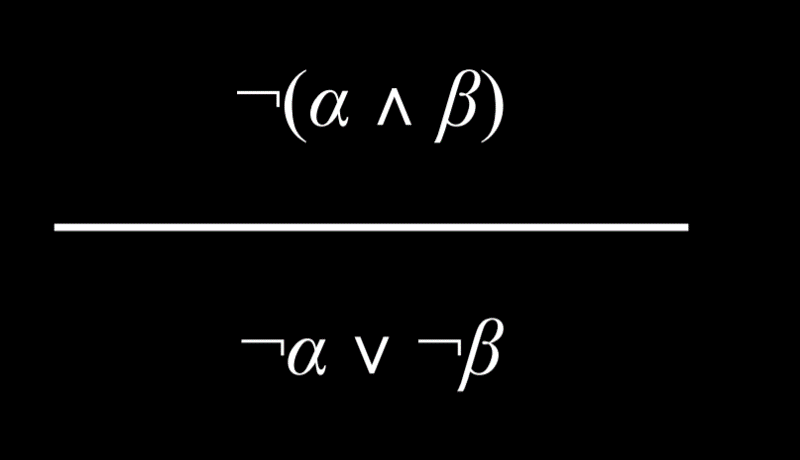

Anche l'inverso è vero: si può trasformare un connettore Or in un And

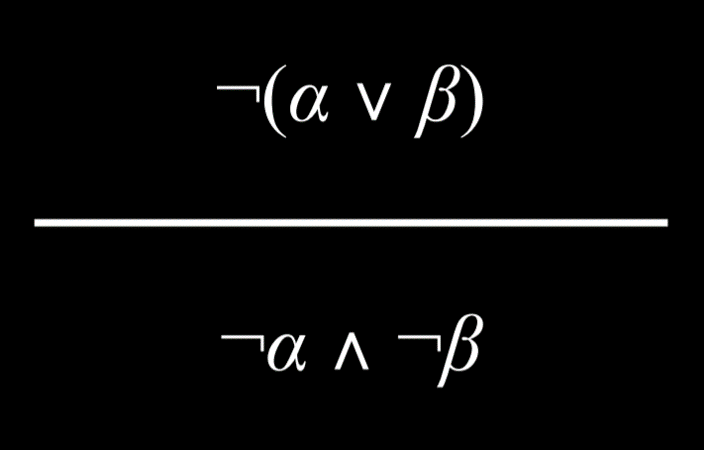

#### Esempi

##### And -> Or

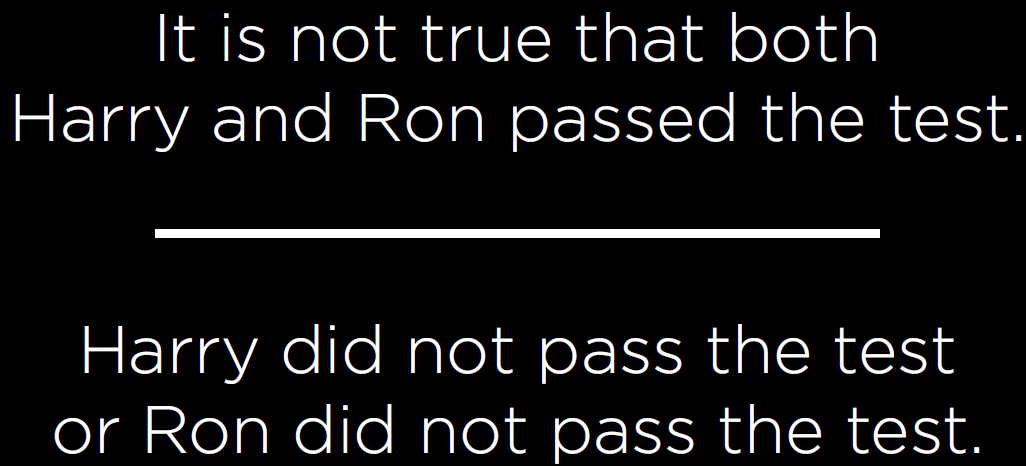

##### Or -> And

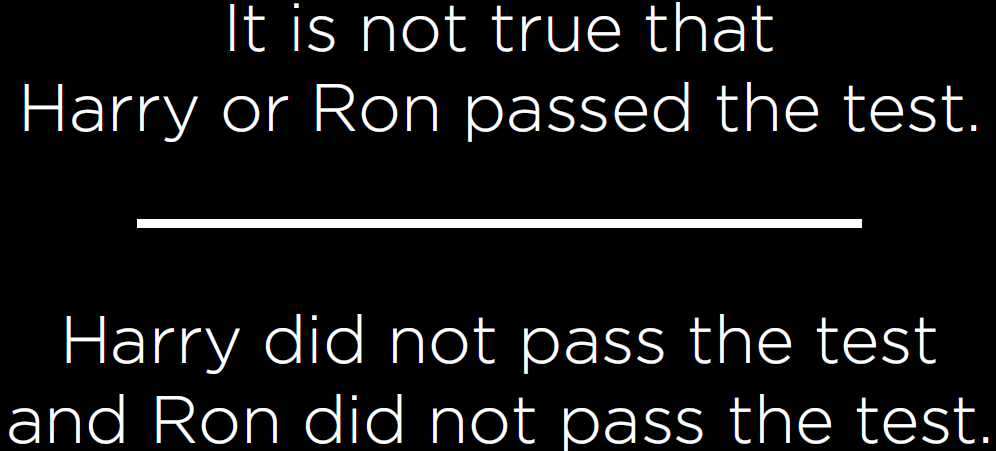

### Proprietà Distributiva

Una proposizione con due elementi che sono raggruppati con connettori And e Or può essere distribuita (o semplificata) in unità più piccole che consistono solo in And o Or

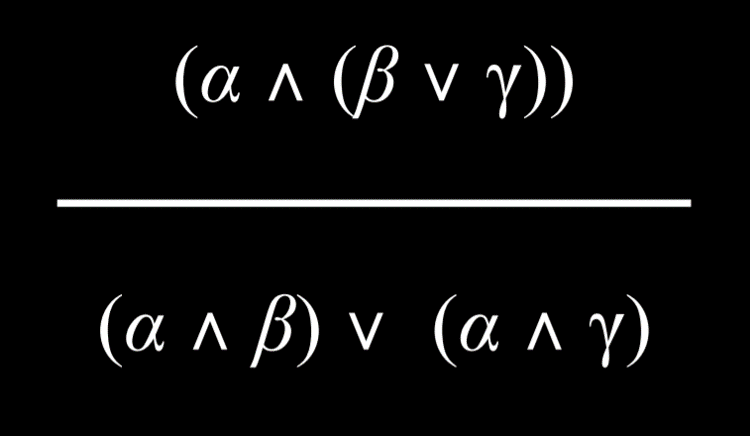

oppure

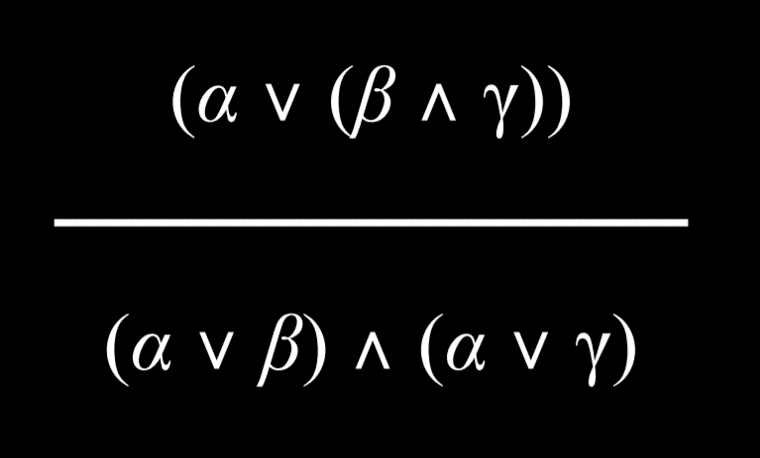

### Knowledge e Problemi di ricerca

Le Inferenze possono essere viste come problemi di ricerca (Search problem) con le seguenti proprietà:

- **Stato iniziale**
: Knowledge Base (KB) iniziale
- **Azioni**
: Regole di Inferenza
- **Modelli di Transizione**
: Nuova Knowledge Base dopo l'inferenza
- **Goal test**
: controllare se l'affermazione che stiamo cercando di provare è nella KB
- **Path Cost Function**
: Il numero di step della prova

Questo dimostra quanto sono versatili gli algoritmi di ricerca, permettendoci di derivare nuove informazioni basandoci su conoscenza pre-esistente usando regole di inferenza

### Resolution (Risoluzione)

#### Unit Resolution

Unit Resolution è una potente regola di inferenza che afferma:

Se una di due proposizioni atomiche in una proposizione Or è falsa, l'altra deve essere vera.

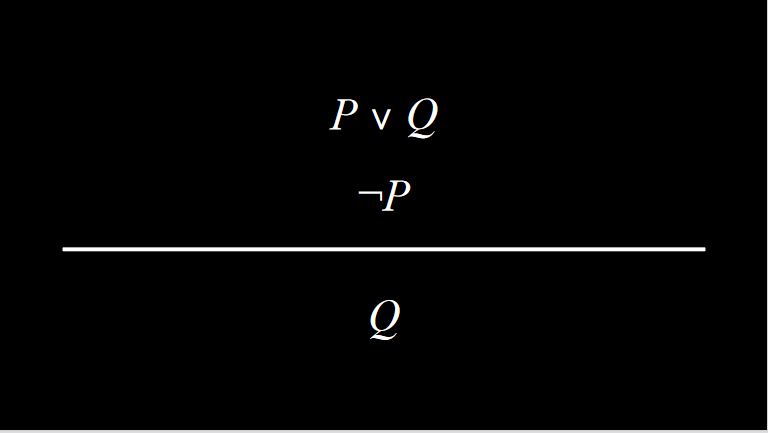

#### Esempio:

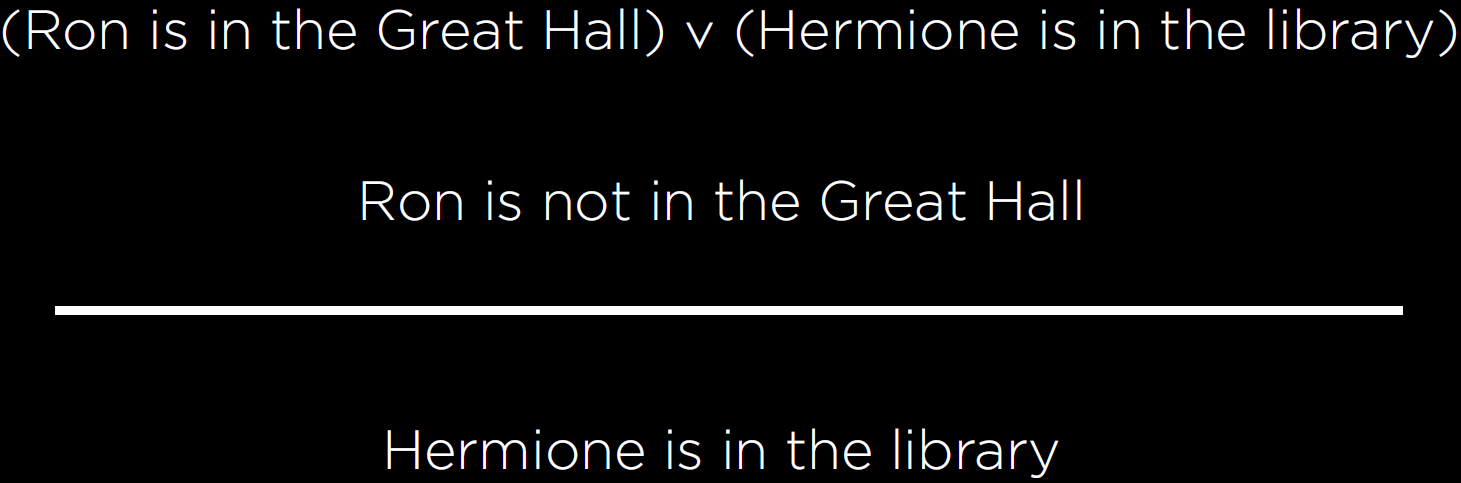

Resolution si basa sui **Complemetary Literals** (Letterali complementari): due proposizioni atomiche uguali, con una che è negata e l'altra no, come P e ¬P

### Resolution generale

Generalizziamo la Unit Resolution. Posto che $Q$ non è una proposizione atomica ma una catena di proposizioni Or, possiamo affermare che:

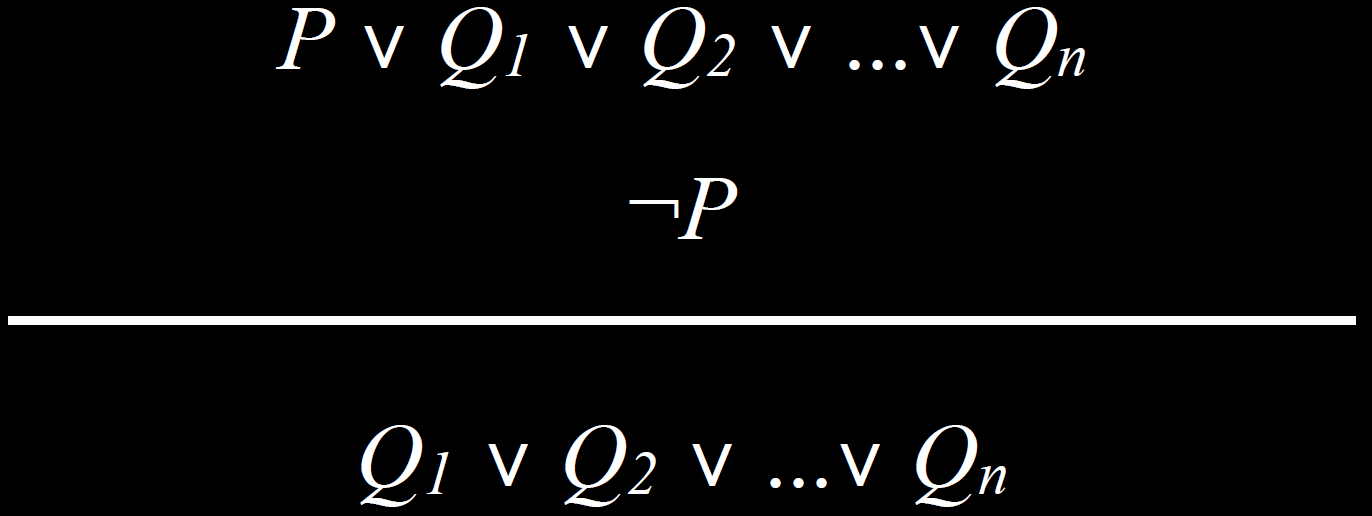

### Definizioni

#### Literals (Letterali)

Un simbolo propositivo o la sua negazione

Ad esempio: P o ¬P

#### Disjunction (disgiunzione)

Proposizioni connesse attraverso un connettore logico Or

Ad esempio: $P ∨ Q ∨ R$

#### Conjuction (congiunzione)

Proposizioni connesse attraverso un connettore logico And

Ad esempio: $P ∧ Q ∧ R$

#### Clause (Clausola)

Una disgiunzione di letterali

Ad esempio: $P ∨ Q ∨ R$

Sono sintatticamente uguali alle disgiunzioni, ma ci consentono di convertire ogni affermazione logica in una *Conjunctive Normal Form*

#### Conjunctive Normal Form (CNF)

Frase logica che è una congiunzione di clausole attraverso un connettore logico And

Ad esempio: (A ∨ B ∨ C) ∧ (D ∨ ¬E) ∧ (F ∨ G)

Ogni frase logica può essere trasformata in questa forma attraverso regole di inferenza e trasformazioni. Di seguito come fare.

### Conversione in CNF / Inference by Resolution

Bisogna prendere tutti i simboli che non sono parte della CNF, come biconditionals, implications, ecc... e trasformarli in qualcosa che può appartenere alla CNF.

Guida passo per passo:

1. Eliminare i **Biconditionals**
  - Trasforma $α ↔ β$ in $(α→β) ∧ (β→α)$

2. Eliminare le **Implications**
  - Trasforma $α → β$ in $¬α ∨ β$

3. Muovi le negazioni verso l'interno finché solo i letterali vengono negati, e non le clausole, usando le Leggi di DeMorgan
  - Trasforma $¬(α ∧ β)$ in $¬α ∨ ¬β$
  - Trasforma $¬(α ∨ β)$ in $¬α ∧ ¬β$

4. Usa la Proprietà Distributiva per distribuire ∨ ovunque sia possibile

#### Esempio:

Convertiamo $(P ∨ Q) → R$ in Conjuctive Normal Form

1. $(P ∨ Q) → R$
2. Eliminiamo l'implicazione: $¬(P ∨ Q) ∨ R$
3. Legge di DeMorgan: $(¬P ∧ ¬Q) ∨ R$
4. Proprietà Distributiva: $(¬P ∨ R) ∧ (¬Q ∨ R)$


## Inference by Resolution, Teoria

Uso la Resolution per inferire nuove informazioni: sfrutto le nuove clausole ottenute attraverso la conversione in CNF per generare nuova conoscenza.

È basato sulla stessa idea della risoluzione. possiamo valutare due clausole diverse, la cui unica proposizione in comune è P nella prima e ¬P nella seconda, in questo modo:

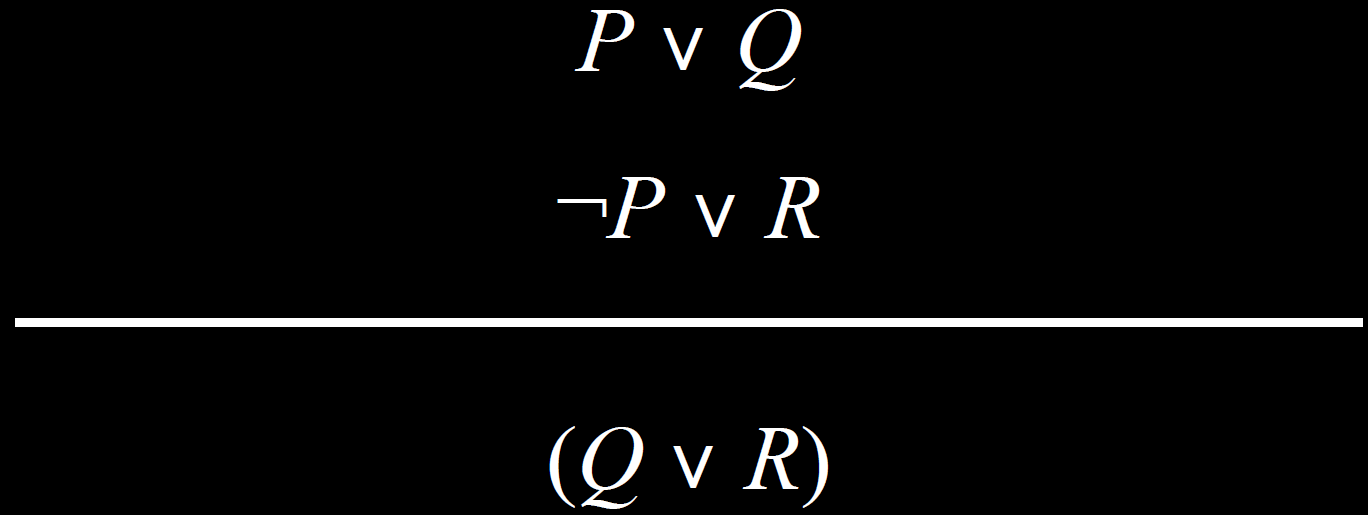

I letterali complementari ci consentono di generare nuove frasi attraverso l'inferenza tramite risoluzione. Gli algoritmi di inferenza, quindi, localizzano letterali complementari per generare nuova conoscenza.

#### Esempio:

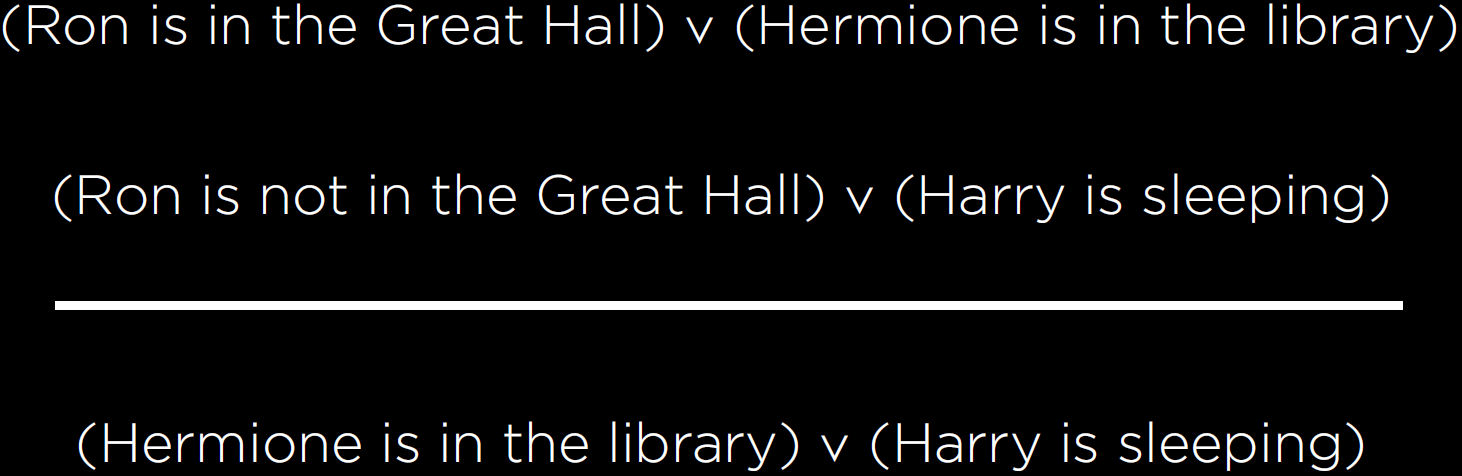

#### Rappresentazione per più valori di Q e R

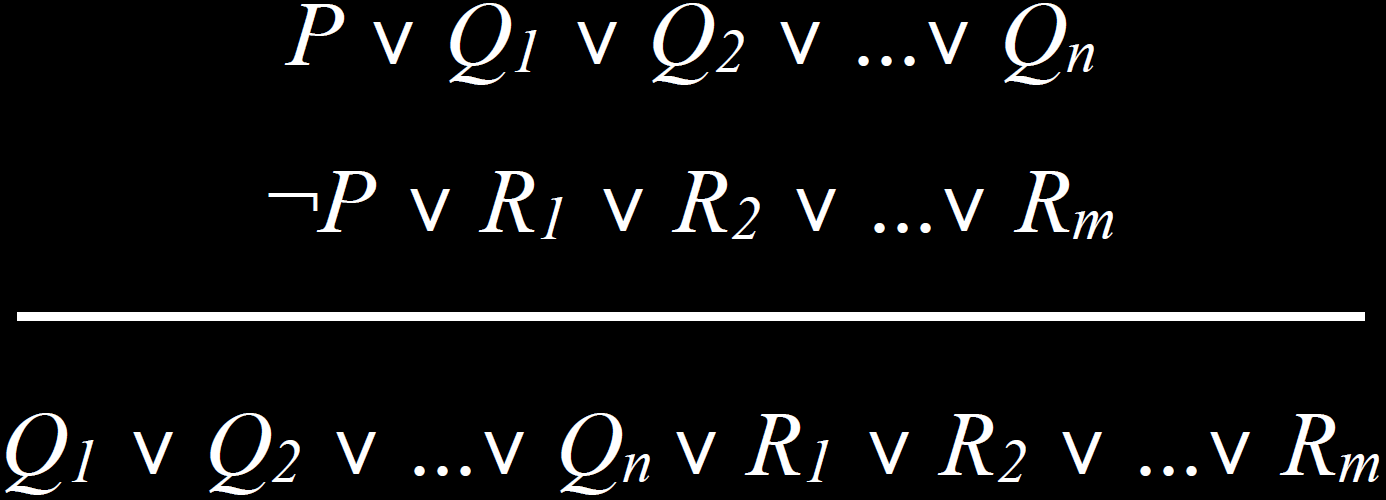

### Factoring

Formalmente, se un letterale è presente in entrambe le clausole, la soluzione sarebbe:

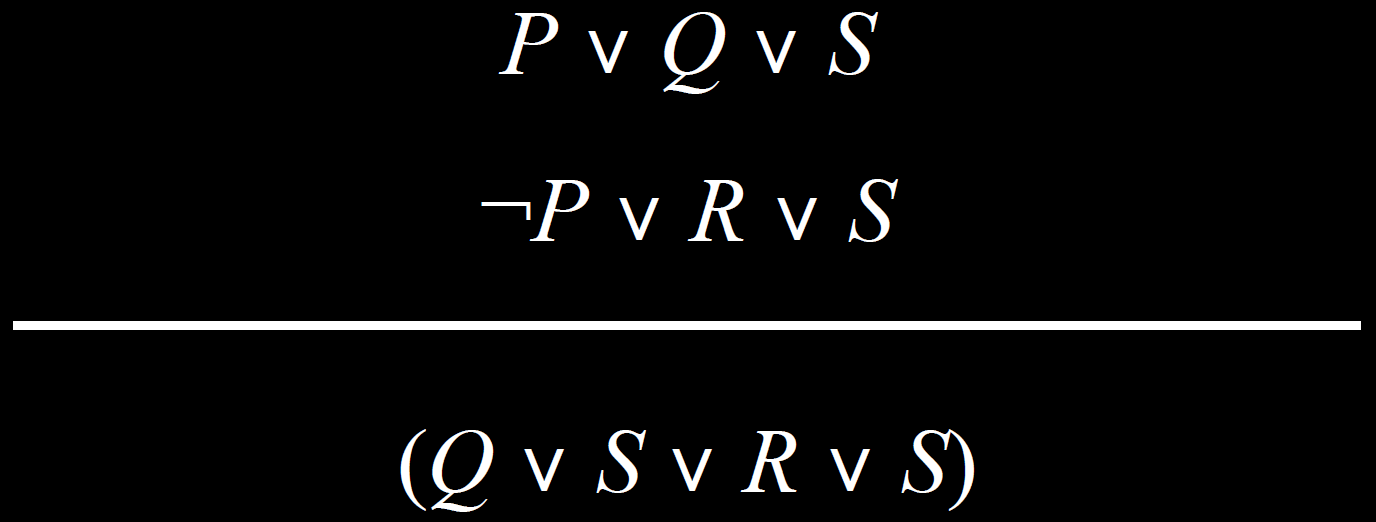

Ma usando il processo di *Factoring*, se ci sono duplicati, useremo solo un letterale al loro posto. La soluzione quindi è:

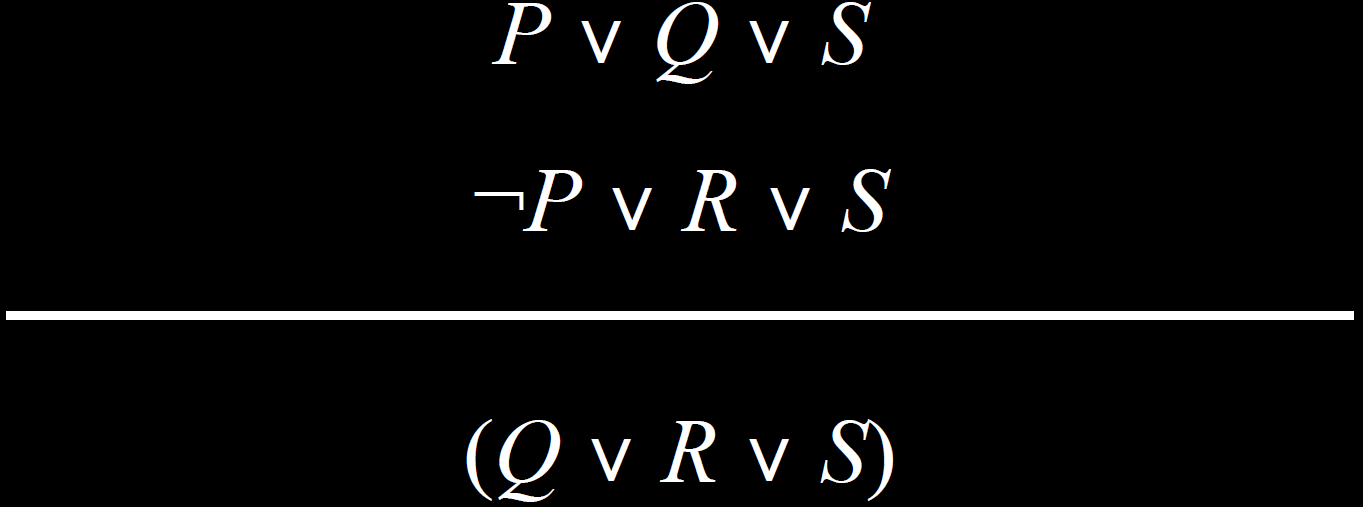

### P and Not P

Se so che P = True e ¬P = True, per la Resolution so che posso unire le altre clausole insieme.

Ma non ci sono altre clausole, quindi rimaniamo con la **Clausola vuota: ()**, che è sempre False.

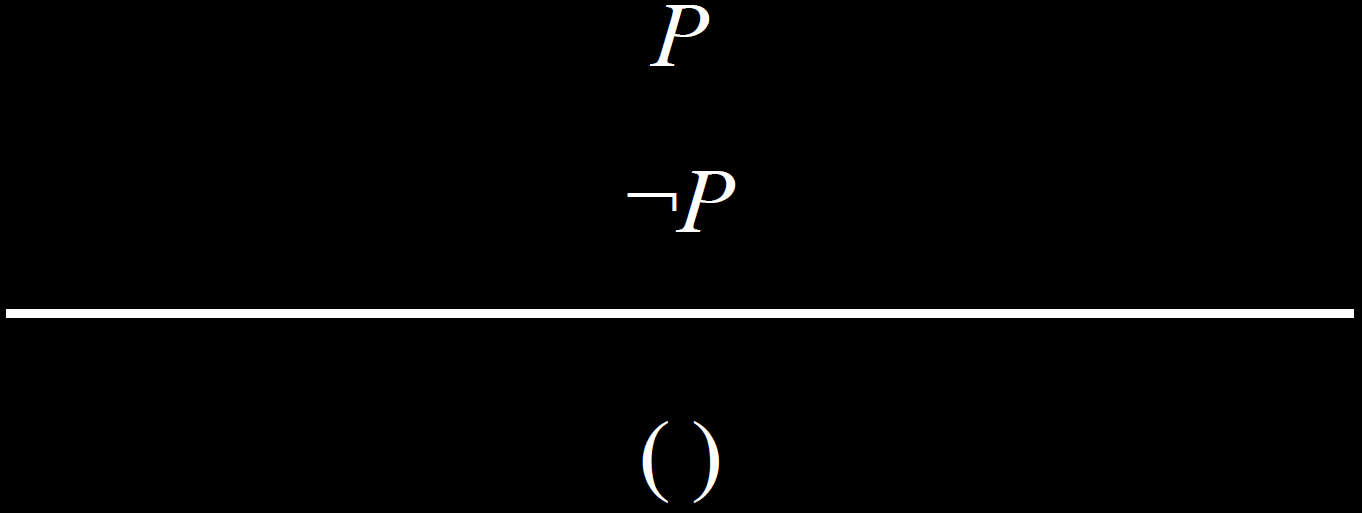

## Inference by Resolution, in pratica

Per determinare se $KB ⊨ α$
- Controllo: $(KB ∧ ¬α)$ è una contraddizione?
  - Se sì, allora $KB ⊨ α$
  - Altrimenti, non c'è entailment

#### Dimostrazione per contraddizione

- Se la nostra $KB$ è vera, ciò contraddice $¬α$.
- Ciò vuol dire che $¬α$ = False e, quindi, $α$ = True.

Per determinare se $KB ⊨ α$, l'algoritmo eseguirà le seguenti azioni:

1. Converti $(KB ∧ ¬α)$ in Conjuctive Normal Form
2. Continua a controllare se possiamo usare la *Risoluzione* per produrre una nuova clausola.
  - Se produciamo anche solo una clausola vuota, equivalente a False, siamo arrivati alla contraddizione, provando che $KB ⊨ α$
  - Tuttavia, se la contraddizione non viene ottenuta e non possono più essere inferite nuove clausole, non c'è entailment.

#### Esempio

Valutiamo come potrebbe funzionare l'algoritmo.

$KB: (A ∨ B) ∧ (¬B ∨ C) ∧ (¬C)$ entails $A$?

1. Innanzitutto, per dimostrare tramite contraddizione, assumiamo che $A = False$.
  - Arriviamo quindi alla congiunzione: $(A ∨ B) ∧ (¬B ∨ C) ∧ (¬C) ∧ (¬A)$.
  - Posso lavorare su due qualsiasi delle clausole nell'ordine che più mi aggrada.

2. Ora possiamo iniziare a generare nuova informazione. Visto che sappiamo che $¬C$, cioè $C = False$, l'unico modo per $(¬B ∨ C)$ di essere $True$ è se anche $B=False$.
  - Possiamo quindi aggiungere $(¬B)$ alla nostra $KB$.

3. Poi, visto che sappiamo che $(¬B)$, l'unico modo per cui $(A ∨ B)$ è $True$ è se $A = True$.
  - Quindi, aggiungiamo $A$ alla nostra $KB$.

4. Ora la nostra $KB$ ha due letterali complementari: $(A)$ e $(¬A)$. Li risolviamo, arrivando all'empty set: $()$.
  - L'empty set è $False$ per definizione, quindi siamo arrivati alla contraddizione.

## First Order Logic

La **First Order Logic** ci consente di esprimere idee più complesse in maniera più succinta rispetto alla *Propositional Logic* (Ricorda il problema delle case di Hogwarts).

La Propositional Logic aveva bisogno di un simbolo per ogni variazione e caso.

La First Order Logic usa due tipi di simboli:

- **Constant Symbols**
: rappresentano oggetti
- **Predicate Symbols**
: rappresentano definizioni, relazioni o funzioni che accettano uno o più argomenti, e restituiscono un valore True o False

### Esempio Case di Hogwarts

##### Propositional Logic

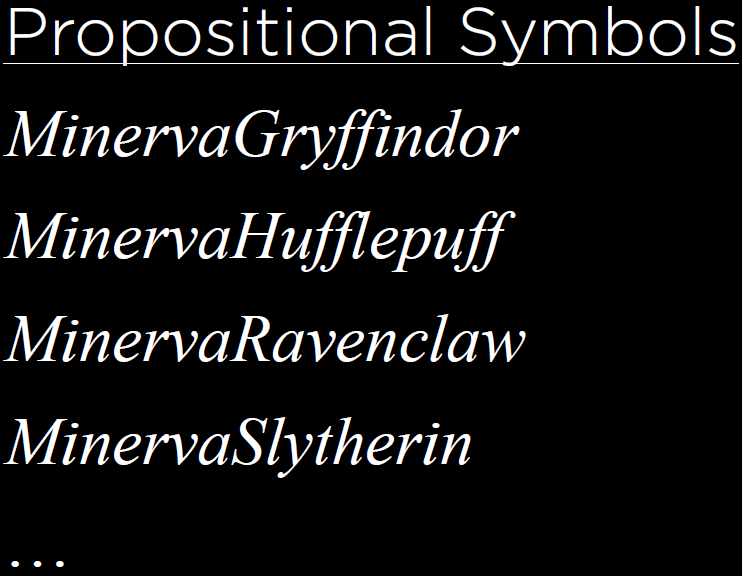

#### First Order Logic

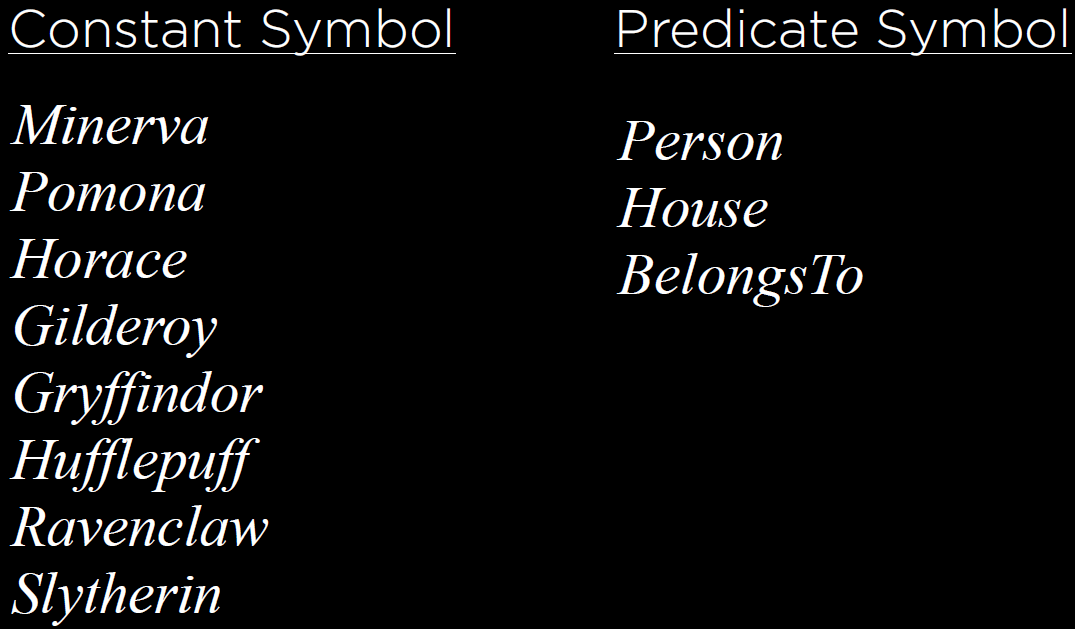

##### Significati in F.O.L.

| Espressione formale | Significato |
| --- | --- |
| $Person(Minerva)$ | Minerva è una persona |
| $House(Gryffindor)$ | Grifondoro è una casa |
| $¬House(Minerva)$ | Minerva non è una casa |
| $BelongsTo(Minerva, Gryffindor)$ | Minerva appartiene a Grifondoro |

Da notare come, in Propositional Logic, avevo bisogno di un simbolo per ogni combinazione Persona-Casa. In First Order Logic, invece, me ne basta uno per persona e uno per casa.


### Quantifiers

First Order Logic ha altre feature che ci aiutano a esprimere idee più complesse, chiamati Quantifiers (Quantificatori).

La quantificazione è uno strumento che può essere usato in First Oder Logic per rappresentare frasi senza usare un simbolo costante specifico.

Esistono:
- Universal Quantification
- Existential Quantification

#### Universal Quantification

L'Universal Quantification ci permette di esprimere l'idea che qualcosa è vero per tutti i valori di una variabile.

Viene espressa con il simbolo ∀: "per ogni".

#### Esempio

Espressione formale:
- ∀x. BelongsTo(x, Gryffindor) → ¬BelongsTo(x, Hufflepuff)
. Per tutti i valori di x, se `BelongsTo(x, Gryffindor) = True` allora `BelongsTo(x, Hufflepuff) = False`

Significato letterale:
- Per tutti gli oggetti x, se x appartiene a Grifondoro, allora x non appartiene a Hufflepuff
- Chiunque in Grifondoro non è un Hufflepuff

### Existential Quantification

Mentre l'Universal Quantification si usa per creare frasi vere per tutti gli oggetti x, l'**Existential Quantification** si usa per creare frasi che sono vere per uno o più oggetti x, ma non tutti.

Viene espressa con il simbolo ∃: "esiste".

#### Esempio

Espressione formale:
- ∃x. House(x) ∧ BelongsTo(Minerva, x)
- Esiste un oggetto x tale che x è una casa e Minerva appartiene a x

Significato letterale:
- Minerva appartiene a una casa

### Combinazione di Universal e Existential Quantification

Espressione formale:
- ∀x. Person(x) → (∃y. House(y) ∧ BelongsTo(x, y))
- Per ogni oggetto x, se x è una persona, allora esiste un oggetto y, y è una casa, e x appartiene a y

Significato letterale:
- Per ogni valore di x, se x è una persona allora esiste una casa y alla quale appartiene una persona x
- Ogni persona appartiene a una casa